In [2]:
# First, import the necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft
from scipy.signal import find_peaks
from scipy.interpolate import interp1d

In [2]:
# Generate random signal
np.random.seed(0) # For reproducibility
x = np.random.randn(500)
fs = 100 # Example sampling frequency in Hz
tAxis = np.linspace(0,5,500) # in seconds

# Calculate Fast Fourier Transform
xfft = np.abs(fft(x,1024))
xfft = xfft[0:512]
fAxis = np.linspace(0,50,512) # in Hz

Text(0.5, 0, 'Frequency [Hz]')

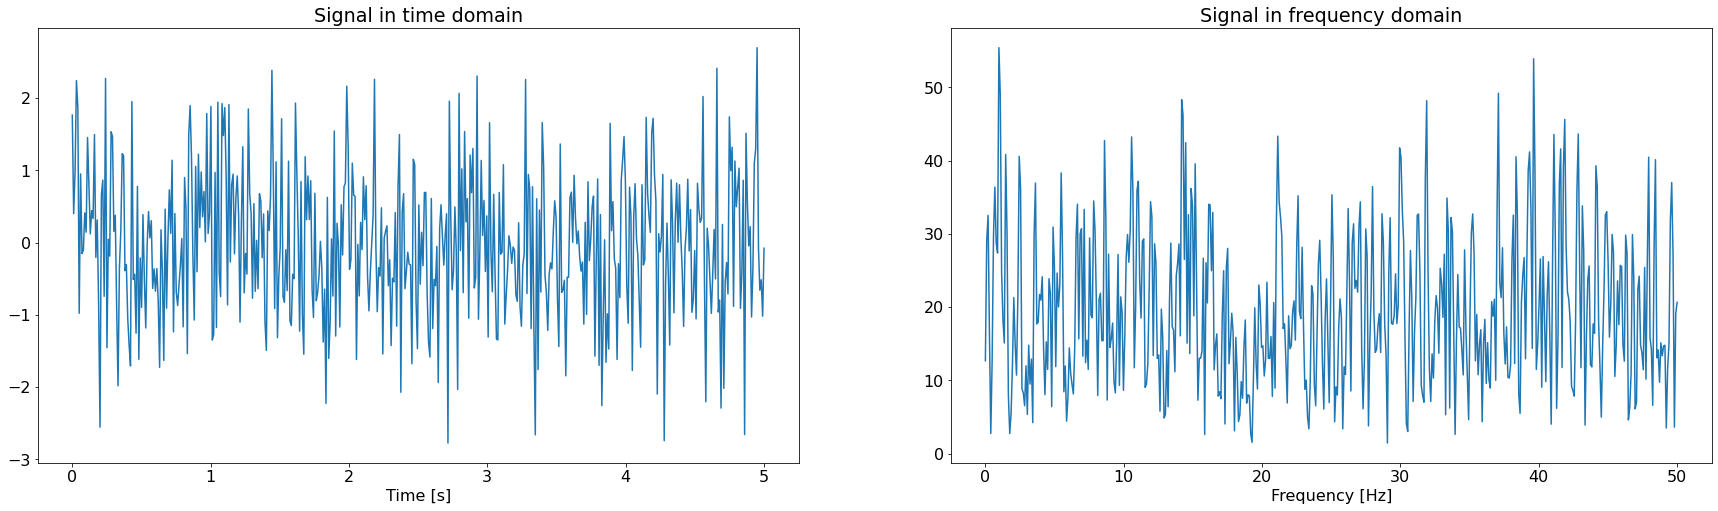

In [8]:
plt.rcParams.update({'font.size' : 16})

plt.figure(figsize = (30,8))
plt.subplot(1,2,1)
plt.plot(tAxis,x)
plt.xlabel('Time [s]')
plt.title('Signal in time domain')
plt.subplot(1,2,2)
plt.plot(fAxis,xfft)
plt.title('Signal in frequency domain')
plt.xlabel('Frequency [Hz]')

In [ ]:
#Find all possible local maximas and minimas

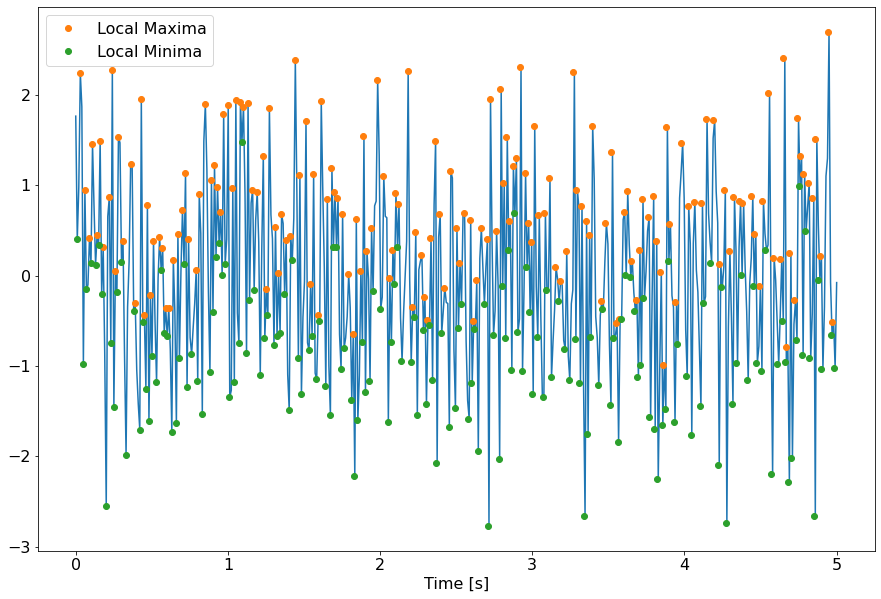

In [6]:
upper_peaks, _ = find_peaks(x)
lower_peaks, _ = find_peaks(-x)

plt.rcParams.update({'font.size' : 16})
plt.figure(figsize = (15,10))
plt.plot(tAxis,x)
plt.plot(upper_peaks/fs,x[upper_peaks],'o',label = 'Local Maxima')
plt.plot(lower_peaks/fs,x[lower_peaks],'o',label = 'Local Minima')
plt.xlabel('Time [s]')
plt.legend(loc = 'upper left')

In [ ]:
#Calculate maxima and minima envelopes

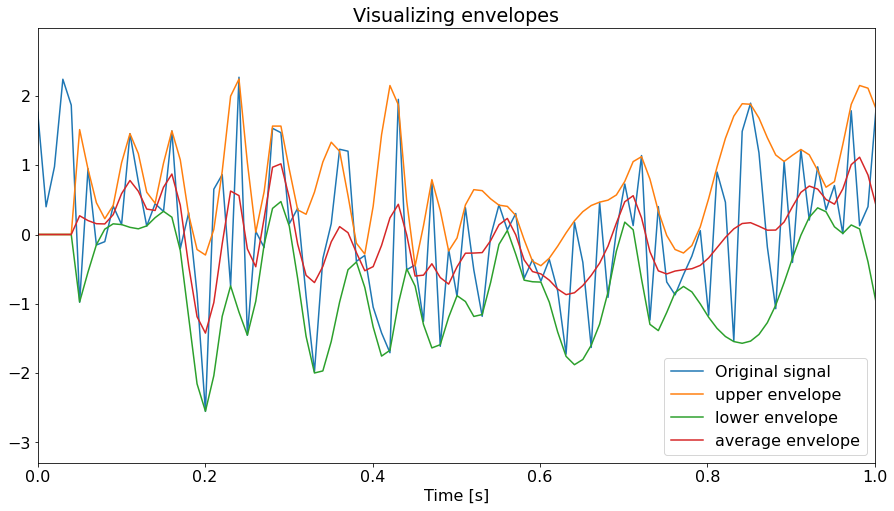

In [11]:
f1 = interp1d(upper_peaks/fs,x[upper_peaks], kind = 'cubic', fill_value = 'extrapolate')
f2 = interp1d(lower_peaks/fs,x[lower_peaks], kind = 'cubic', fill_value = 'extrapolate')

y1 = f1(tAxis)
y2 = f2(tAxis)

# Zero padding to avoid singularities at the edges of the signal
y1[0:5] = 0
y1[-5:] = 0
y2[0:5] = 0
y2[-5:] = 0
avg_envelope = (y1 + y2) / 2


plt.figure(figsize = (15,8))
plt.plot(tAxis,x, label = 'Original signal')
plt.plot(tAxis,y1, label = 'upper envelope')
plt.plot(tAxis,y2, label = 'lower envelope')
plt.plot(tAxis,avg_envelope, label = 'average envelope')
plt.title('Visualizing envelopes')
plt.xlim(0,1)
plt.xlabel('Time [s]')
plt.legend(loc = 'lower right')

In [ ]:
# Compute intrinsic modes by subtracting each average enveloped from the original signals such that upper and lower envelopes
# meets a criteria where they summed up to zero. If their sum is not zero them that would be stop for the respective intrinsic mode.

Text(0.5, 1.0, 'Signal frequency spectrum in the first iteration')

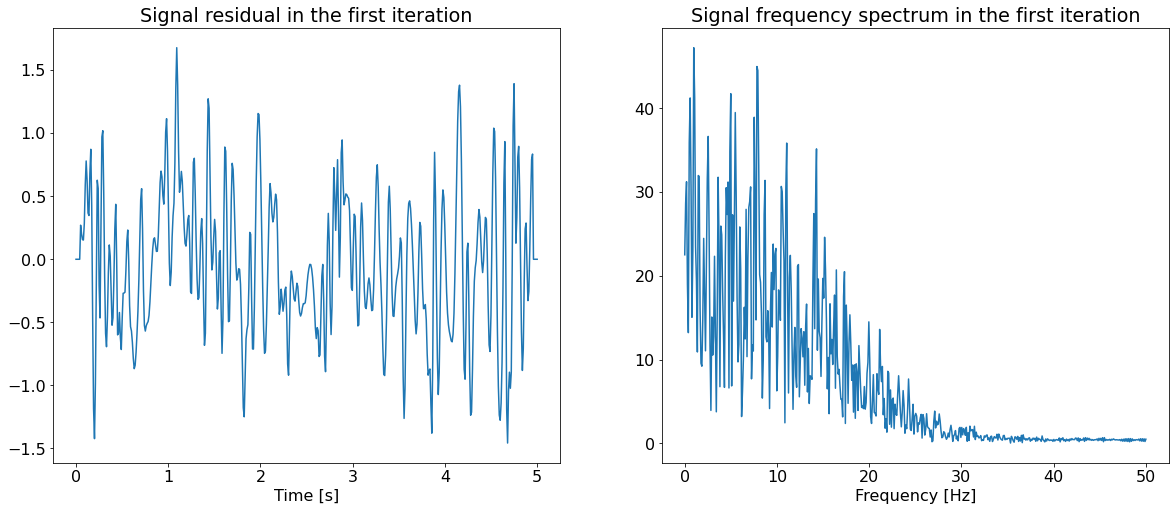

In [13]:
res1 = avg_envelope
imf1 = x - avg_envelope

# Calculate Fast Fourier Transform
xfft1 = np.abs(fft(res1,1024))
xfft1 = xfft1[0:512]

plt.figure(figsize = (20,8))
plt.subplot(1,2,1)
plt.plot(tAxis,res1)
plt.xlabel('Time [s]')
plt.title('Signal residual in the first iteration')
plt.subplot(1,2,2)
plt.plot(fAxis,xfft1)
plt.xlabel('Frequency [Hz]')
plt.title('Signal frequency spectrum in the first iteration')

In [ ]:
#Now we use the first iteration residual for next iteration and apply same method to get seconf IMF

Text(0.5, 1.0, 'Signal frequency spectrum in the second iteration')

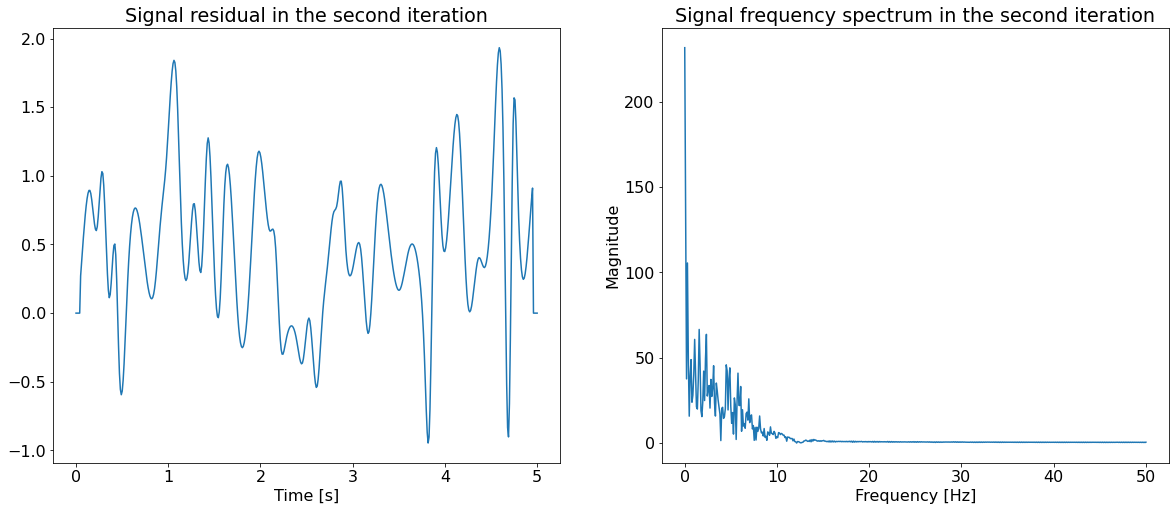

In [15]:
upper_peaks, _ = find_peaks(res1)
lower_peaks, _ = find_peaks(res1)

f1 = interp1d(upper_peaks/fs,res1[upper_peaks], kind = 'cubic', fill_value = 'extrapolate')
f2 = interp1d(lower_peaks/fs,res1[lower_peaks], kind = 'cubic', fill_value = 'extrapolate')

y1 = f1(tAxis)
y2 = f2(tAxis)
y1[0:5] = 0
y1[-5:] = 0
y2[0:5] = 0
y2[-5:] = 0

avg_envelope = (y1 + y2) / 2

res2 = avg_envelope
imf2 = res1 - avg_envelope
# Calculate Fast Fourier Transform
xfft2 = np.abs(fft(res2,1024))
xfft2 = xfft2[0:512]

plt.figure(figsize = (20,8))
plt.subplot(1,2,1)
plt.plot(tAxis,res2)
plt.xlabel('Time [s]')
plt.title('Signal residual in the second iteration')
plt.subplot(1,2,2)
plt.plot(fAxis,xfft2)
plt.xlabel('Frequency [Hz]')
plt.ylabel('Magnitude')
plt.title('Signal frequency spectrum in the second iteration')

Text(0.5, 1.0, 'Signal frequency spectrum in the third iteration')

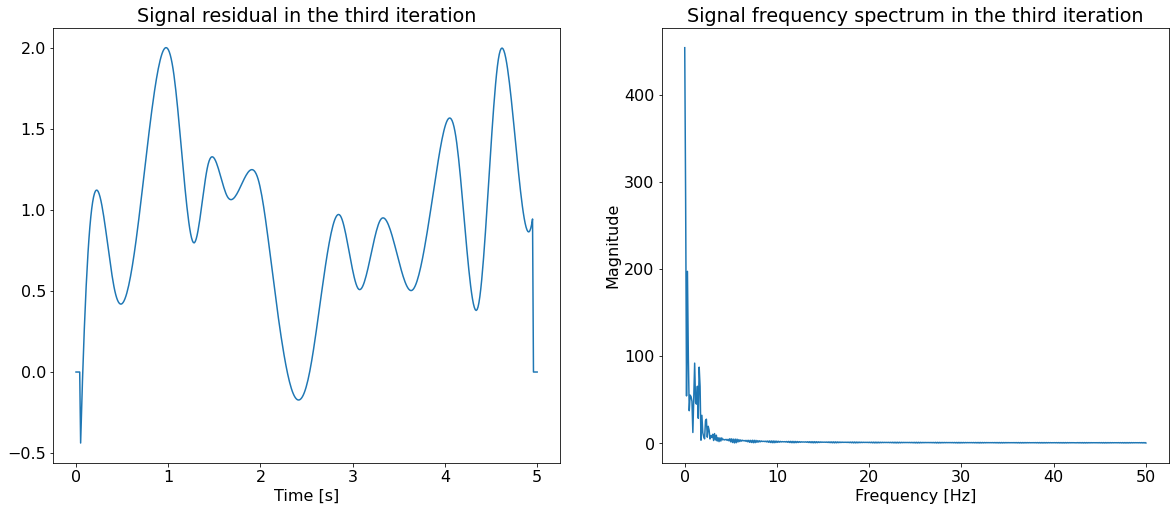

In [18]:
upper_peaks, _ = find_peaks(res2)
lower_peaks, _ = find_peaks(res2)

f1 = interp1d(upper_peaks/fs,res2[upper_peaks], kind = 'cubic', fill_value = 'extrapolate')
f2 = interp1d(lower_peaks/fs,res2[lower_peaks], kind = 'cubic', fill_value = 'extrapolate')

y1 = f1(tAxis)
y2 = f2(tAxis)
y1[0:5] = 0
y1[-5:] = 0
y2[0:5] = 0
y2[-5:] = 0

avg_envelope = (y1 + y2) / 2

res3 = avg_envelope
imf3 = res2 - avg_envelope
# Calculate Fast Fourier Transform
xfft3 = np.abs(fft(res3,1024))
xfft3 = xfft3[0:512]

plt.figure(figsize = (20,8))
plt.subplot(1,2,1)
plt.plot(tAxis,res3)
plt.xlabel('Time [s]')
plt.title('Signal residual in the third iteration')
plt.subplot(1,2,2)
plt.plot(fAxis,xfft3)
plt.xlabel('Frequency [Hz]')
plt.ylabel('Magnitude')
plt.title('Signal frequency spectrum in the third iteration')

Text(0.5, 1.0, 'Signal residual spectrum in the fourth iteration')

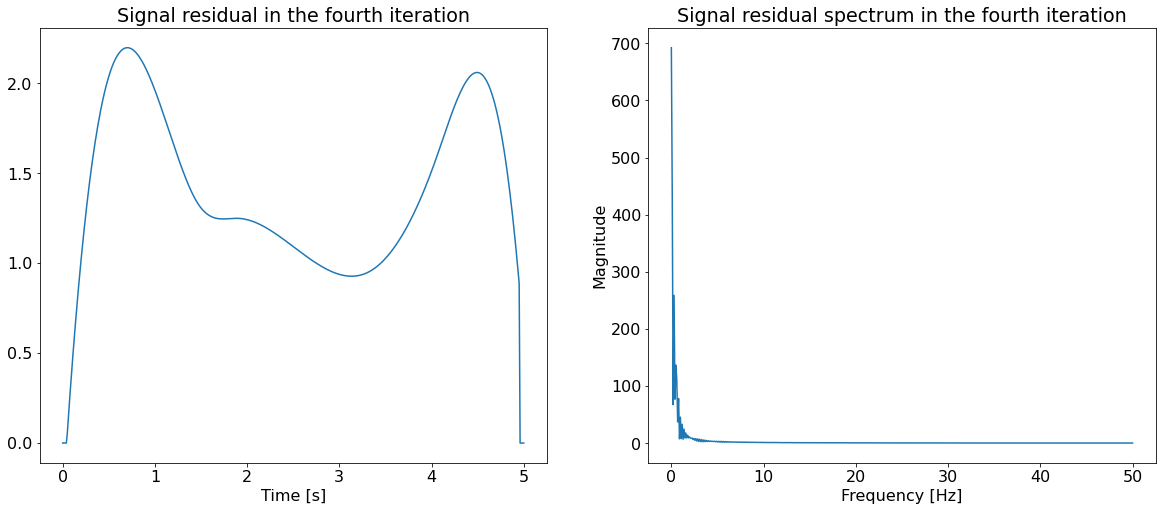

In [19]:
upper_peaks, _ = find_peaks(res3)
lower_peaks, _ = find_peaks(res3)

f1 = interp1d(upper_peaks/fs,res3[upper_peaks], kind = 'cubic', fill_value = 'extrapolate')
f2 = interp1d(lower_peaks/fs,res3[lower_peaks], kind = 'cubic', fill_value = 'extrapolate')

y1 = f1(tAxis)
y2 = f2(tAxis)
y1[0:5] = 0
y1[-5:] = 0
y2[0:5] = 0
y2[-5:] = 0

avg_envelope = (y1 + y2) / 2

res4 = avg_envelope
imf4 = res3 - avg_envelope
# Calculate Fast Fourier Transform
xfft4 = np.abs(fft(res4,1024))
xfft4 = xfft4[0:512]

plt.figure(figsize = (20,8))
plt.subplot(1,2,1)
plt.plot(tAxis,res4)
plt.xlabel('Time [s]')
plt.title('Signal residual in the fourth iteration')
plt.subplot(1,2,2)
plt.plot(fAxis,xfft4)
plt.xlabel('Frequency [Hz]')
plt.ylabel('Magnitude')
plt.title('Signal residual spectrum in the fourth iteration')

Text(0.5, 0, 'Frequency [Hz]')

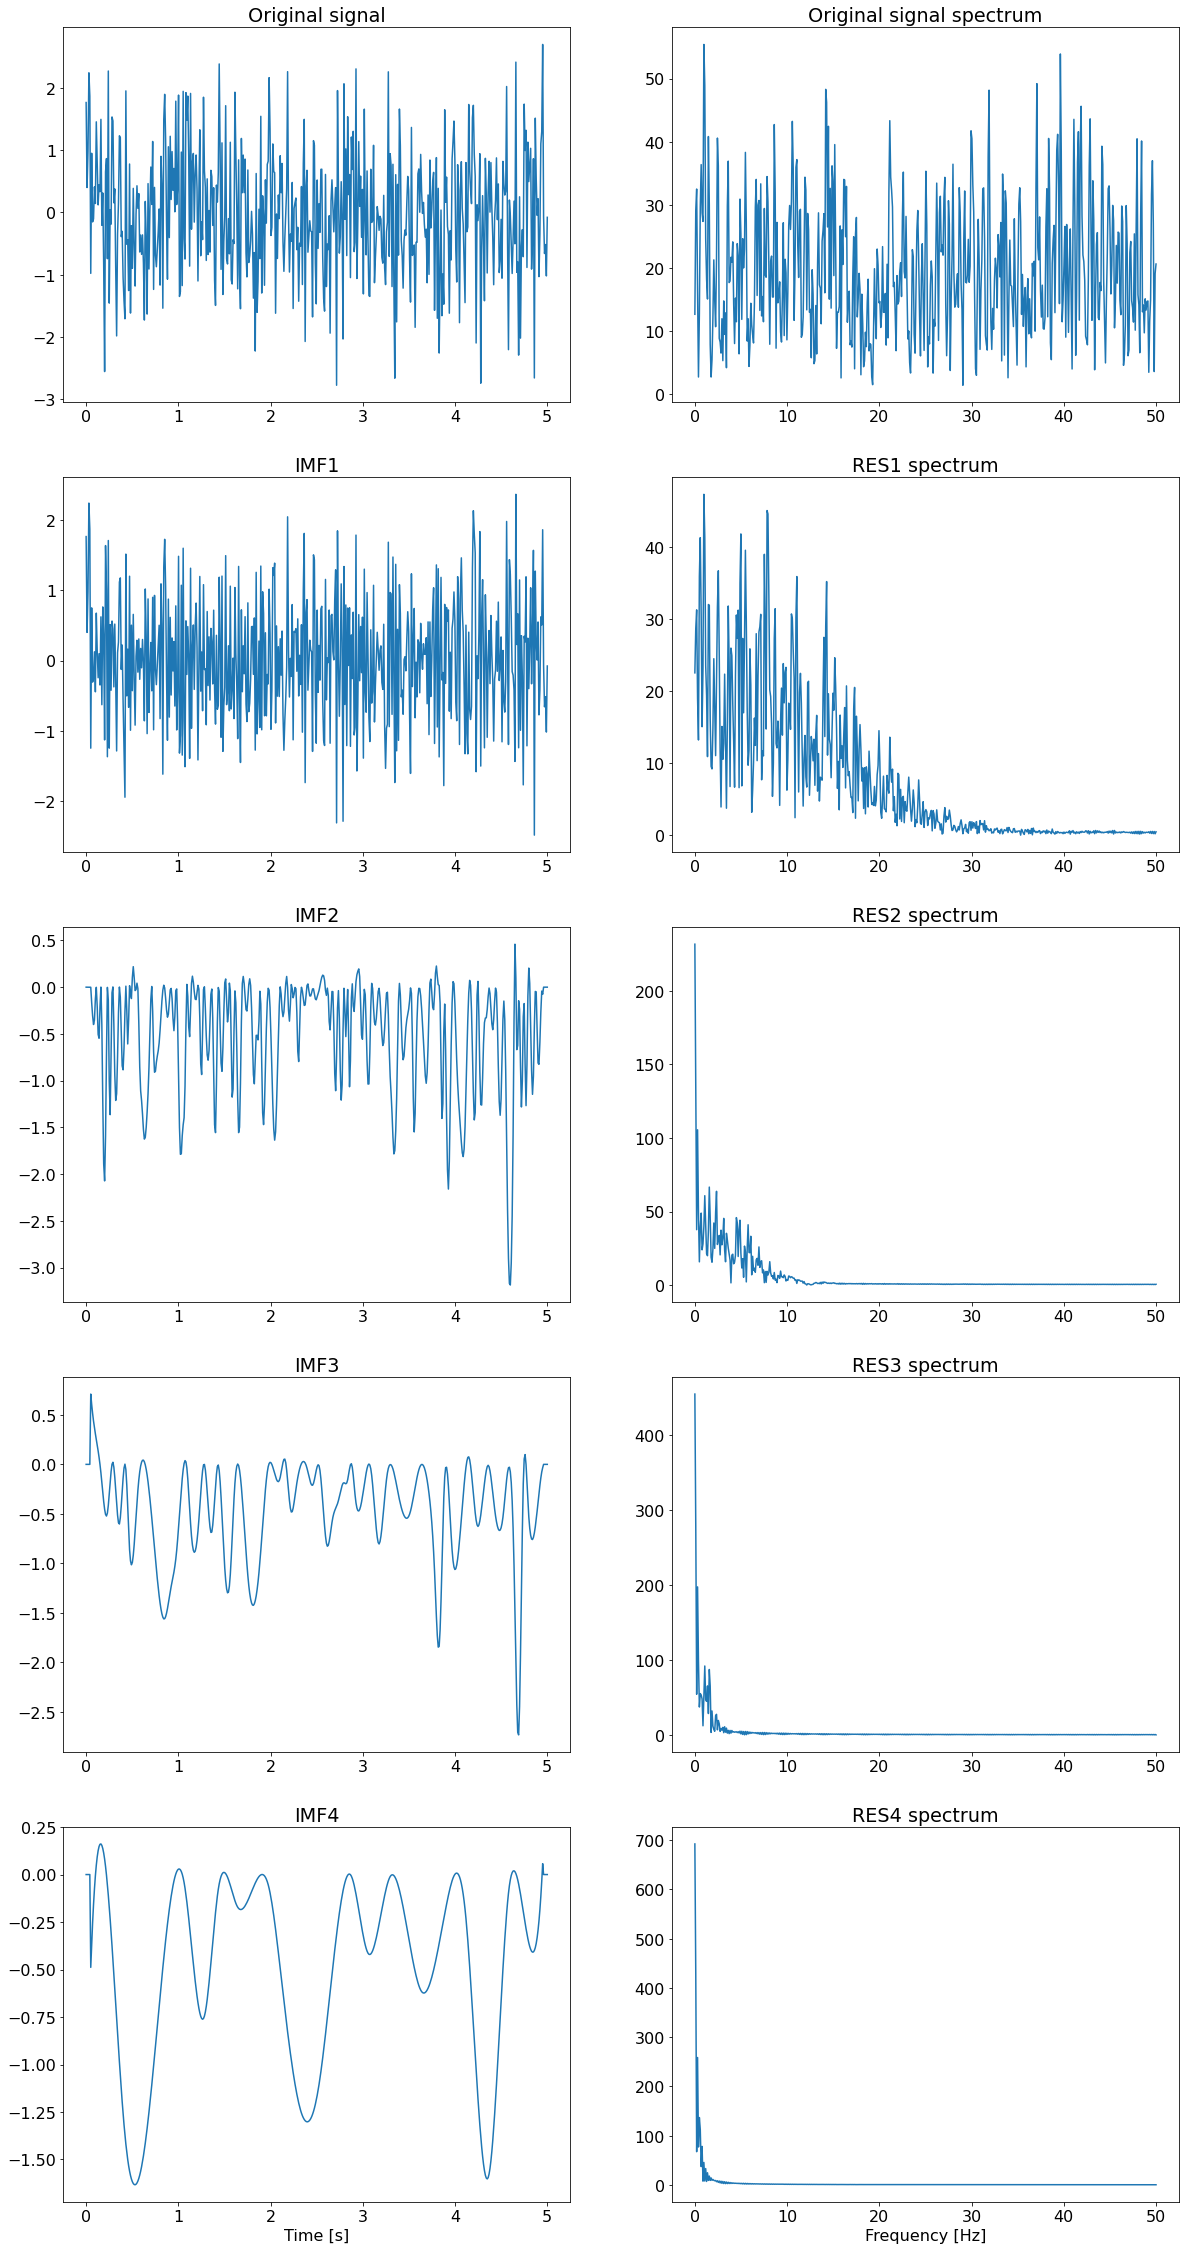

In [20]:
plt.figure(figsize = (20,40))
plt.subplot(5,2,1)
plt.plot(tAxis,x)
plt.title('Original signal')
plt.subplot(5,2,2)
plt.plot(fAxis,xfft)
plt.title('Original signal spectrum')
plt.subplot(5,2,3)
plt.plot(tAxis,imf1)
plt.title('IMF1')
plt.subplot(5,2,4)
plt.plot(fAxis,xfft1)
plt.title('RES1 spectrum')
plt.subplot(5,2,5)
plt.plot(tAxis,imf2)
plt.title('IMF2')
plt.subplot(5,2,6)
plt.plot(fAxis,xfft2)
plt.title('RES2 spectrum')
plt.subplot(5,2,7)
plt.plot(tAxis,imf3)
plt.title('IMF3')
plt.subplot(5,2,8)
plt.plot(fAxis,xfft3)
plt.title('RES3 spectrum')
plt.subplot(5,2,9)
plt.plot(tAxis,imf4)
plt.title('IMF4')
plt.xlabel('Time [s]')
plt.subplot(5,2,10)
plt.plot(fAxis,xfft4)
plt.title('RES4 spectrum')
plt.xlabel('Frequency [Hz]')

Text(0.5, 1.0, 'Original - Reconstructed')

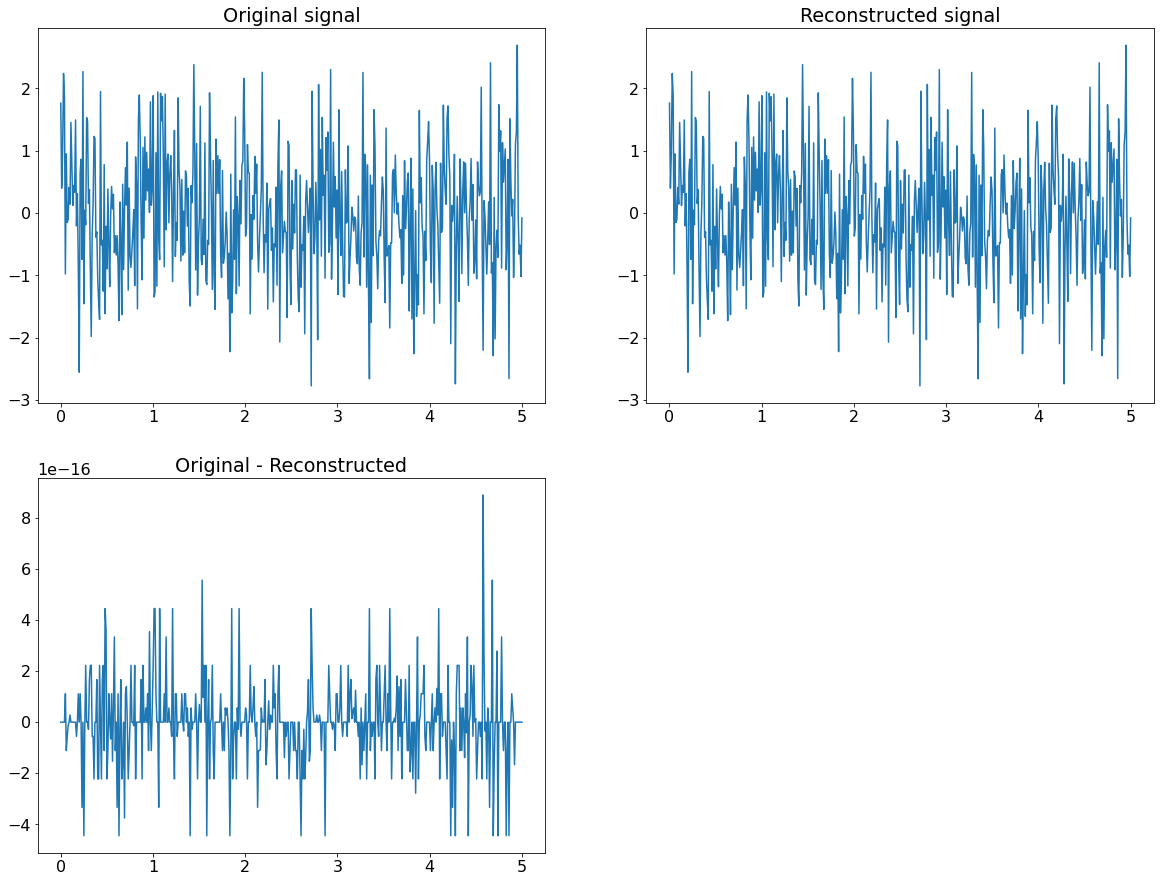

In [30]:
plt.figure(figsize = (20,40))
plt.subplot(5,2,1)
plt.plot(tAxis,x)
plt.title('Original signal')
plt.subplot(5,2,2)
plt.plot(tAxis,imf1+imf2+imf3+imf4+res4)
plt.title('Reconstructed signal')
plt.subplot(5,2,3)
plt.plot(tAxis,(x-(imf1+imf2+imf3+imf4+res4)))
plt.title('Original - Reconstructed')